In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import math
import pandas as pd

In [93]:
def readFiles(fileName):
    with open(fileName) as f:
        str1 = f.readlines()
        total = " "
        for it in str1:
            total+=it
        comment = re.compile(r'[0-9]*/[0-9]*',re.DOTALL)
        l = comment.findall(total)
        return l

def translateToList(l):
    listr = []
    for item in l:
        tmp = item.split('/')
        tmp[0] = int(tmp[0])
        tmp[1] = int(tmp[1])
        listr.append(tmp)
    return listr

def CalculateRate(l):
    y = []
    if len(l)<2:
        print("ERR in len")
        return
    for i in range(len(l))[1:]:
        recvCount = l[i][0]-l[0][0]
        needToRecv = l[i][1]-l[0][1]
        y.append(recvCount/needToRecv)
    return y

def plotSingleFileRateFromL(l,plot = True):
    x = range(len(l))
    if(plot):
        plt.plot(x,l) 
        plt.show()
    s = pd.Series(l)
    return s.describe()

def plotFile(fileName):
    resultStr = readFiles(fileName)
    resultInt = translateToList(resultStr)
    rate = CalculateRate(resultInt)
    plotSingleFileRateFromL(rate)

def getAllFileDescribe(dire,prefix,name):
    allResult = []
    for item in range(len(prefix)):
        resultStr = readFiles(dire+prefix[item]+name)
        resultInt = translateToList(resultStr)
        rate = CalculateRate(resultInt)
        allResult.append(plotSingleFileRateFromL(rate,False))
    return allResult
def plotStatistics(dire,prefix,name):
    result = getAllFileDescribe(dire,prefix,name)
    resultMean = []
    resultMax = []
    resultStd = []
    resultMin = []
    for item in result:
        resultMean.append(item['mean'])
        resultMax.append(item['max'])
        resultMin.append(item['min'])
        resultStd.append(item['std'])
    for pre in prefix:
        pre = float(pre)
    print(resultMean)
    print(prefix)
    plt.plot(prefix,resultMean,label='mean')
    plt.plot(prefix,resultMax,label='max')
    plt.plot(prefix,resultMin,label='min')
    plt.plot(prefix,resultStd,label='std')
    plt.legend()
    plt.show()

In [134]:
direction_0 = 'data/packetLoss/0°/'
fileName_0 = 'm_0.log'
filePrefix_0 = ["11","11.5","12","13","14.7","15.7","16","16.5","17","17.5","18","18.5","19","19.5","20"]
direction_90 = 'data/packetLoss/90°/'
fileName_90 = 'm_90.log'
filePrefix_90 = ["0","1","2","3","4","5","6","7","7.5","8","8.5","9","9.5","10","10.5"]
directoin_180 = 'data/packetLoss/180°/'
fileName_180 = 'm_180.log'
filePrefix_180 = []

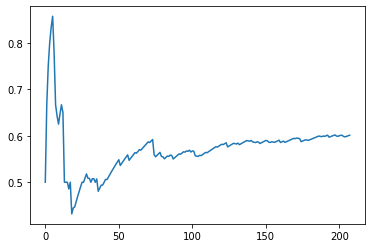

In [128]:
a = plotFile(direction_90+"8.5"+fileName_90)

[0.6285720643360467, 0.634180775441418, 0.6567906275001659, 0.6954119496115977, 0.5637985070576903, 0.18229508454632298, 0.29578845419310457, 0.34935583556350636, 0.2672695211334932, 0.3735394574120453, 0.11520950226767386, 0.13004895967379812, 0.4217685493185336, 0.08301971992453051, 0.04439764368725507]
['11', '11.5', '12', '13', '14.7', '15.7', '16', '16.5', '17', '17.5', '18', '18.5', '19', '19.5', '20']


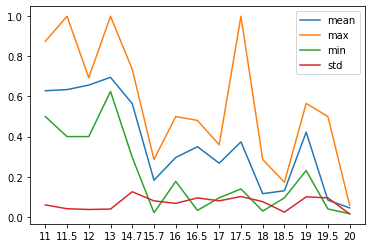

In [95]:
plotStatistics(direction_0,filePrefix_0,fileName_0)

[0.9373421697818107, 0.6906795542150779, 0.7805274403672374, 0.8393703465699894, 0.7071713539115867, 0.7779198729843536, 0.6314188674543775, 0.7668797303220602, 0.5649134163925317, 0.6385160357406944, 0.5716358707173682, 0.6645002739569374, 0.29130577041021316, 0.11215356522868447, 0.426599164135459]
['0', '1', '2', '3', '4', '5', '6', '7', '7.5', '8', '8.5', '9', '9.5', '10', '10.5']


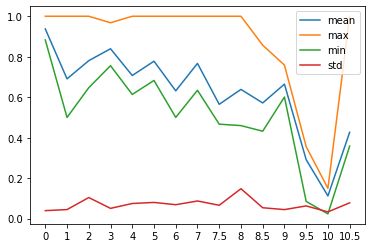

In [135]:
plotStatistics(direction_90,filePrefix_90,fileName_90)

In [91]:
plotStatistics

[count    175.000000
 mean       0.937342
 std        0.039455
 min        0.882883
 25%        0.905919
 50%        0.915663
 75%        0.978019
 max        1.000000
 dtype: float64]